<a href="https://colab.research.google.com/github/arko-14/HYDROPREDICT/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error



env_data = env_data = pd.read_csv('/content/drive/MyDrive/dataset_train1.csv', encoding='latin-1')  # Try 'latin-1' or 'ISO-8859-1'  # contains 'precipitation', 'rainfall', 'temperature', 'soil_temperature'
groundwater_data = pd.read_csv('/content/drive/MyDrive/groundwater_train2.csv',encoding='latin-1')  # contains 'groundwater_level'

# Merging the two datasets based on a common key, like date and location, if they are not pre-aligned by row
data = pd.merge(env_data, groundwater_data, on=['Year', 'Month','Location'])

# Defining the feature set (X) and target variable (y)
X = data[['precipitation(mm)', 'rain(mm)', 'temperature_80m (°C)', 'soil_temp(°C)']]
y = data['Water Level']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and training the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)



Mean Absolute Error: 3.808780412242146
Mean Squared Error: 23.64395323461292
Root Mean Squared Error: 4.8625048313202655


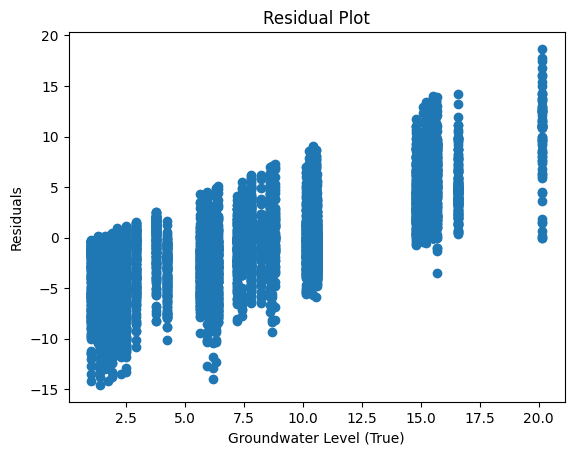

In [ ]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Groundwater Level (True)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
# Calculating the absolute difference
absolute_difference = abs(y_test - y_pred)

# Displaying the first few absolute differences
print(absolute_difference[:10])


15287    2.267847
27358    2.282400
9838     6.373229
896      3.674100
19287    7.342900
12810    4.908448
19237    7.302118
21760    4.479967
9084     5.460780
25296    2.956525
Name: Water Level, dtype: float64


In [ ]:
percentage_error = (abs(y_test - y_pred) / y_test) * 100
print(f"Percentage Error: {percentage_error[:10]}")  # For first 10 values


Percentage Error: 15287    141.740407
27358     14.715667
9838     255.952969
896       23.491688
19287    524.492857
12810     63.090594
19237    521.579881
21760     29.668653
9084     321.222362
25296    295.652488
Name: Water Level, dtype: float64


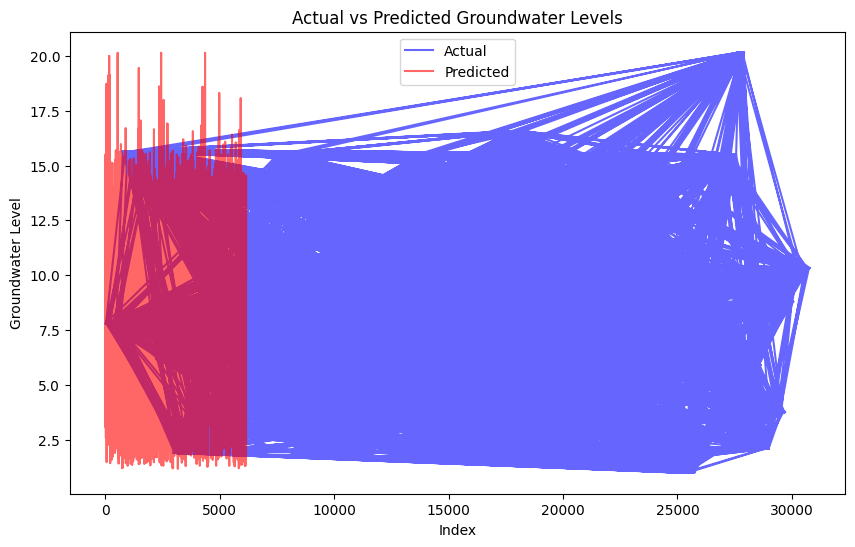

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", color="blue", alpha=0.6)
plt.plot(y_pred, label="Predicted", color="red", alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Groundwater Level')
plt.title('Actual vs Predicted Groundwater Levels')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.0922268999532001


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Best parameters obtained from grid search
best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200
)

# Train the model with the best parameters
best_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200)

In [ ]:
y_pred = best_rf.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculating MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 3.5221065550889183
Mean Squared Error: 19.356088173357314
Root Mean Squared Error: 4.399555451787977
R² Score: 0.256852862482181


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()}")


Cross-validated MSE: 19.368204671199802


In [ ]:
from sklearn.model_selection import cross_val_score
r2_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R² score: {r2_scores.mean()}")


Cross-validated R² score: 0.2469188744528313


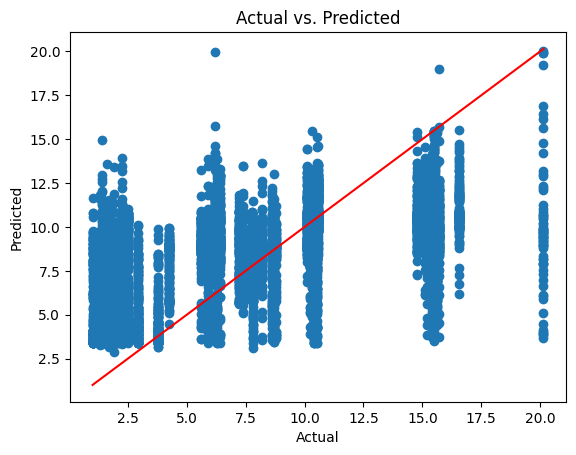

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV with Random Forest
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fitting the randomized search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py",

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 364}


In [ ]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate the model
cross_val_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cross_val_scores.mean()}")


Cross-validated MSE: 19.335883836800654


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 3.5486988036125084
MSE: 19.310760683618405
RMSE: 4.394401060852139
R² Score: 0.2585931415069843


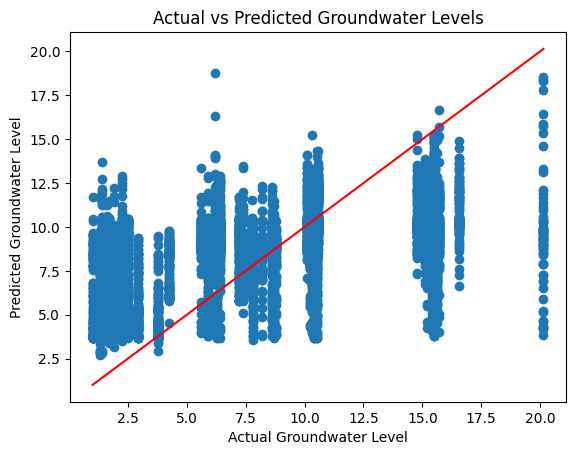

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.xlabel('Actual Groundwater Level')
plt.ylabel('Predicted Groundwater Level')
plt.title('Actual vs Predicted Groundwater Levels')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

!pip install xgboost lightgbm
!pip install dask[dataframe]


INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the groundwater and rainfall datasets
groundwater_train = pd.read_csv('/content/drive/MyDrive/groundwater_train2.csv', encoding='latin-1')
groundwater_test = pd.read_csv('/content/drive/MyDrive/groundwater_test.csv', encoding='latin-1')
rainfall_train = pd.read_csv('/content/drive/MyDrive/dataset_train1.csv', encoding='latin-1')
rainfall_test = pd.read_csv('/content/drive/MyDrive/dataset_test.csv', encoding='latin-1')

# Check column names to ensure correct columns are present in the datasets
print(groundwater_train.columns)
print(groundwater_test.columns)
print(rainfall_train.columns)
print(rainfall_test.columns)

# Groundwater dataset setup
target_column = 'Water Level'  # This is present in the groundwater dataset

# Prepare features and target for groundwater dataset
# groundwater_columns_to_drop = ['precipitation(mm)', 'rain(mm)', 'temperature_80m (°C)', 'soil_temp(°C)'] # These columns are not in groundwater_train
X_train_groundwater = groundwater_train.drop(columns=[target_column])  # Only drop the target column
y_train_groundwater = groundwater_train[target_column]
X_test_groundwater = groundwater_test.drop(columns=[target_column])    # Only drop the target column
y_test_groundwater = groundwater_test[target_column]

# Rainfall dataset setup - This doesn't have 'Water Level'
rainfall_columns_to_drop = ['precipitation(mm)', 'rain(mm)', 'temperature_80m (°C)', 'soil_temp(°C)']
X_train_rainfall = rainfall_train.drop(columns=rainfall_columns_to_drop)
X_train_rainfall = rainfall_train.drop(columns=rainfall_columns_to_drop)
y_train_rainfall = None  # No target column here
X_test_rainfall = rainfall_test.drop(columns=rainfall_columns_to_drop)
y_test_rainfall = None  # No target column here


def create_model_pipeline(model):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['Year']),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Location', 'Month'])
        ])

    return Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Initializing models
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=10)
lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=10)


rf_pipeline = create_model_pipeline(rf_model)
xgb_pipeline = create_model_pipeline(xgb_model)
lgb_pipeline = create_model_pipeline(lgb_model)




print("Training RandomForest on Groundwater Dataset...")
rf_pipeline.fit(X_train_groundwater, y_train_groundwater)

# XGBoost
print("Training XGBoost on Groundwater Dataset...")
xgb_pipeline.fit(X_train_groundwater, y_train_groundwater)

# LightGBM
print("Training LightGBM on Groundwater Dataset...")
lgb_pipeline.fit(X_train_groundwater, y_train_groundwater)

# Predicting and Evaluating the models for Groundwater Dataset


y_pred_rf = rf_pipeline.predict(X_test_groundwater)
y_pred_xgb = xgb_pipeline.predict(X_test_groundwater)
y_pred_lgb = lgb_pipeline.predict(X_test_groundwater)


print("RandomForest Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test_groundwater, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test_groundwater, y_pred_rf))
print("R² Score:", r2_score(y_test_groundwater, y_pred_rf))


print("XGBoost Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test_groundwater, y_pred_xgb))
print("Mean Squared Error:", mean_squared_error(y_test_groundwater, y_pred_xgb))
print("R² Score:", r2_score(y_test_groundwater, y_pred_xgb))


print("LightGBM Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test_groundwater, y_pred_lgb))
print("Mean Squared Error:", mean_squared_error(y_test_groundwater, y_pred_lgb))
print("R² Score:", r2_score(y_test_groundwater, y_pred_lgb))

# You can also train the models using the rainfall data if needed
# For example, you could predict rainfall data with RandomForest, XGBoost, and LightGBM models in a similar manner
# Here, we're focusing on the groundwater dataset as it has the target column "Water Level"




/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Index(['Year', 'Month', 'State', 'Location', 'Water Level'], dtype='object')
Index(['Year', 'Month', 'State', 'Location', 'Water Level'], dtype='object')
Index(['Location', 'time', 'precipitation(mm)', 'rain(mm)',
       'temperature_80m (°C)', 'soil_temp(°C)', 'Year', 'Month'],
      dtype='object')
Index(['Location', 'time', 'precipitation(mm)', 'rain(mm)',
       'temperature_80m (°C)', 'soil_temp(°C)', 'Year', 'Month'],
      dtype='object')
Training RandomForest on Groundwater Dataset...
Training XGBoost on Groundwater Dataset...
Training LightGBM on Groundwater Dataset...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 8
[LightGBM] [Info] Start training from score 10.033548
[LightGBM] [W

In [ ]:
import joblib

# Saving the trained XGBoost model
joblib.dump(xgb_model, 'xgboost_model.joblib')
print("XGBoost model saved successfully!")


XGBoost model saved successfully!


In [ ]:
# Loading the saved XGBoost model
xgb_model = joblib.load('xgboost_model.joblib')
print("XGBoost model loaded successfully!")


XGBoost model loaded successfully!


In [ ]:
print(rainfall_test_data.columns)


Index(['Location', 'precipitation(mm)', 'rain(mm)', 'temperature_80m (Â°C)',
       'soil_temp(Â°C)', 'Year', 'Month', 'time'],
      dtype='object')


In [ ]:
rainfall_test_data.columns = rainfall_test_data.columns.str.strip()  # Remove leading/trailing spaces


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ... (Your existing code to load and preprocess data) ...

# Assuming 'xgb_pipeline' is your trained XGBoost pipeline from previous code
model = xgb_pipeline  # Assign the pipeline to 'model'

# Now you can use 'model' for prediction:
y_pred = model.predict(X_test_groundwater)  # Use the correct test set (X_test_groundwater)
r2 = r2_score(y_test_groundwater, y_pred)  # Use the corresponding target (y_test_groundwater)
print(f'Final R² Score on test set: {r2}')


Final R² Score on test set: 0.8810955081978599


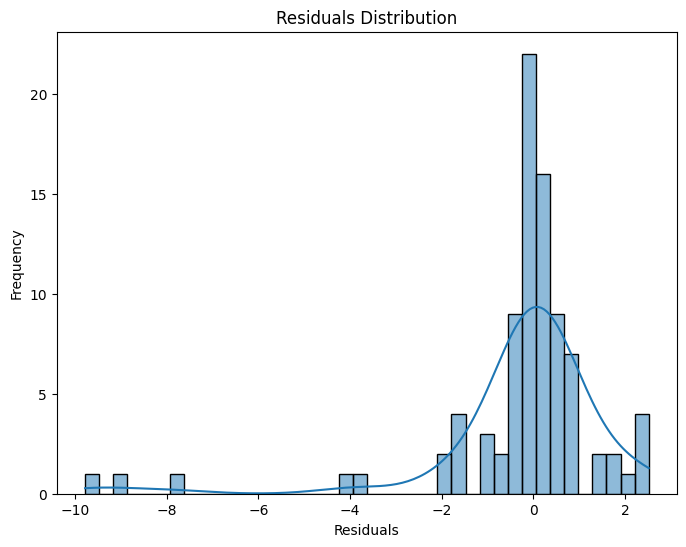

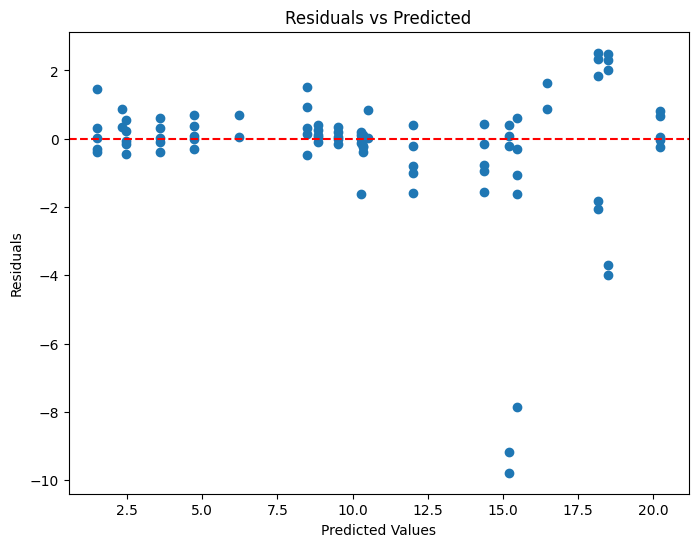

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to analyze the groundwater dataset predictions
y_pred = xgb_pipeline.predict(X_test_groundwater)  # Make predictions using the groundwater test data
residuals = y_test_groundwater - y_pred           # Calculate residuals for the groundwater data

# Now you can proceed with plotting the residuals:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming X_train_groundwater, y_train_groundwater are the training data used earlier
X = X_train_groundwater  # Use the same training data for cross-validation
y = y_train_groundwater

# Cross-validation to check model stability
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² scores: {cross_val_scores}")
print(f"Average Cross-Validation R²: {cross_val_scores.mean()}")


Cross-Validation R² scores: [0.50251417 0.6017338  0.88886443 0.93062498 0.73354317]
Average Cross-Validation R²: 0.7314561102121448


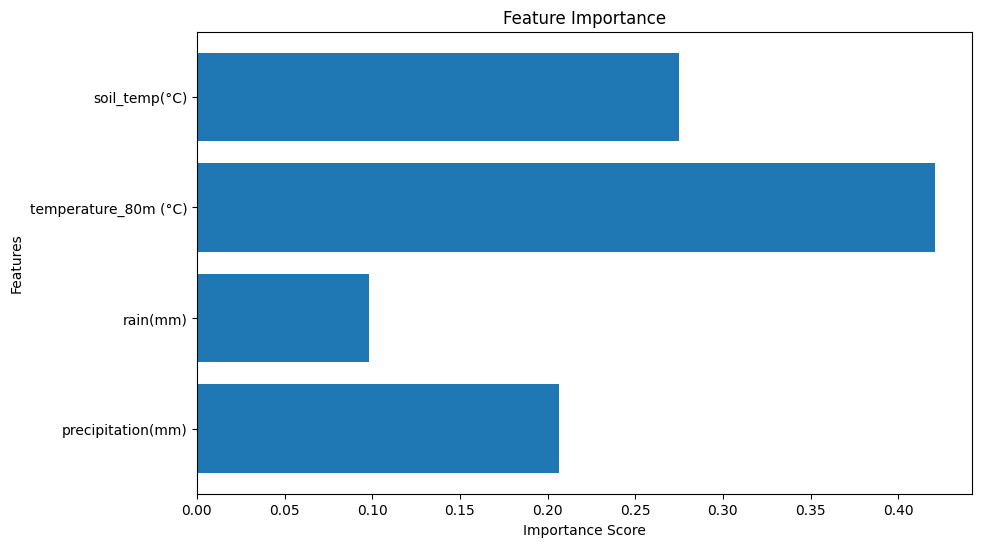

In [ ]:
# Feature importance visualization
import matplotlib.pyplot as plt

xgb_model = best_xgb_model  # After fitting the best model
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, xgb_model.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
print(X_train.isnull().sum())  # Check if any columns have missing values
print(y_train.isnull().sum())  # Check the target variable for missing values


precipitation(mm)       0
rain(mm)                0
temperature_80m (°C)    0
soil_temp(°C)           0
dtype: int64
0


<Axes: >

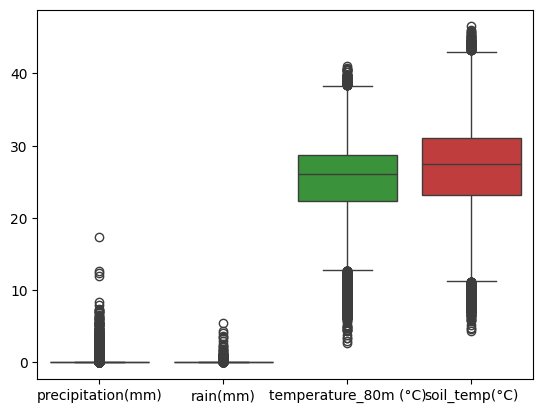

In [ ]:
import seaborn as sns

# Visualize boxplots for outliers
sns.boxplot(data=X_train)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Increase the number of estimators
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],  # L1 regularization
    'reg_lambda': [0.1, 1, 10],  # L2 regularization
}

# RandomizedSearchCV for broader search
random_search = RandomizedSearchCV(XGBRegressor(), param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0.2, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


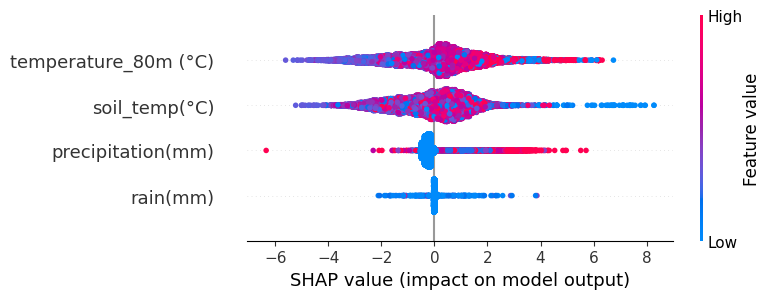

In [ ]:
import shap
from xgboost import XGBRegressor

# Assuming X_train and y_train are your training data
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5)

# Fit the XGBoost model before using it with SHAP
xgb_model.fit(X_train, y_train) # Fit the model to your training data

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)